 ### Modal Analysis of Strip Waveguides

In [70]:
using IntegratedOptics

In [71]:
# plot options
ϵ_axes = Axes(title = "'ϵᵣ'",xlabel = "'x'", ylabel = "'y'", palette = :tempo, auto = "fix",size =" ratio -1");
E_axes = Axes(title = "'E'",xlabel = "'x'", ylabel = "'y'", palette = :balance, auto = "fix",size =" ratio -1");

In [72]:
Si =   Material(ϵᵣ = 3.47^2 );
SiO2 = Material(ϵᵣ = 1.44^2 );

In [73]:
λ₀ = 1.55; 

In [74]:
Lx =  λ₀; dx = λ₀ / 10 / 3.47^2;
Ly =  λ₀; dy = λ₀ / 10 / 3.47^2;
grid = Grid(extent = (Lx,Ly), spacing =  (dx,dy));

In [75]:
sim = Simulation(λ₀ = λ₀ ; grid  = grid);
sim(setbackground!,SiO2);

In [76]:
width = 0.5
height = 0.220
wave_guide(x) = abs(x[1] - .5Lx) <= width/2 && abs(x[2] - .5Ly) <= height/2 
sim(setmaterial!,Si,wave_guide);

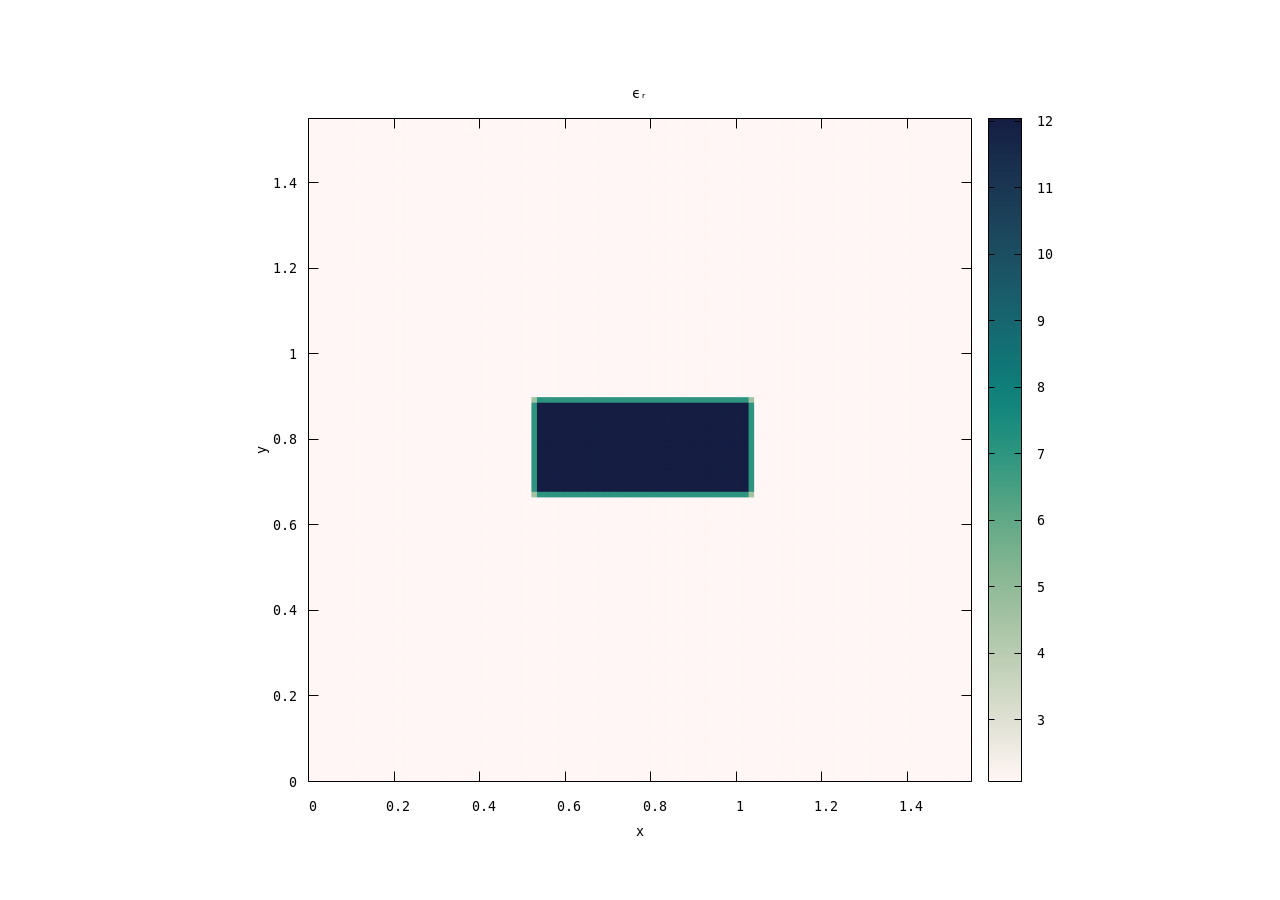

In [77]:
sim(HeatMap,:ϵᵣ,ẑ,axes = ϵ_axes)
#sim(saveplot)

In [78]:
eig_vals , eig_vecs = sim(solve_for_modes,solver = EigArpack());

2.439141211055212 - 2.610864149652119e-15im


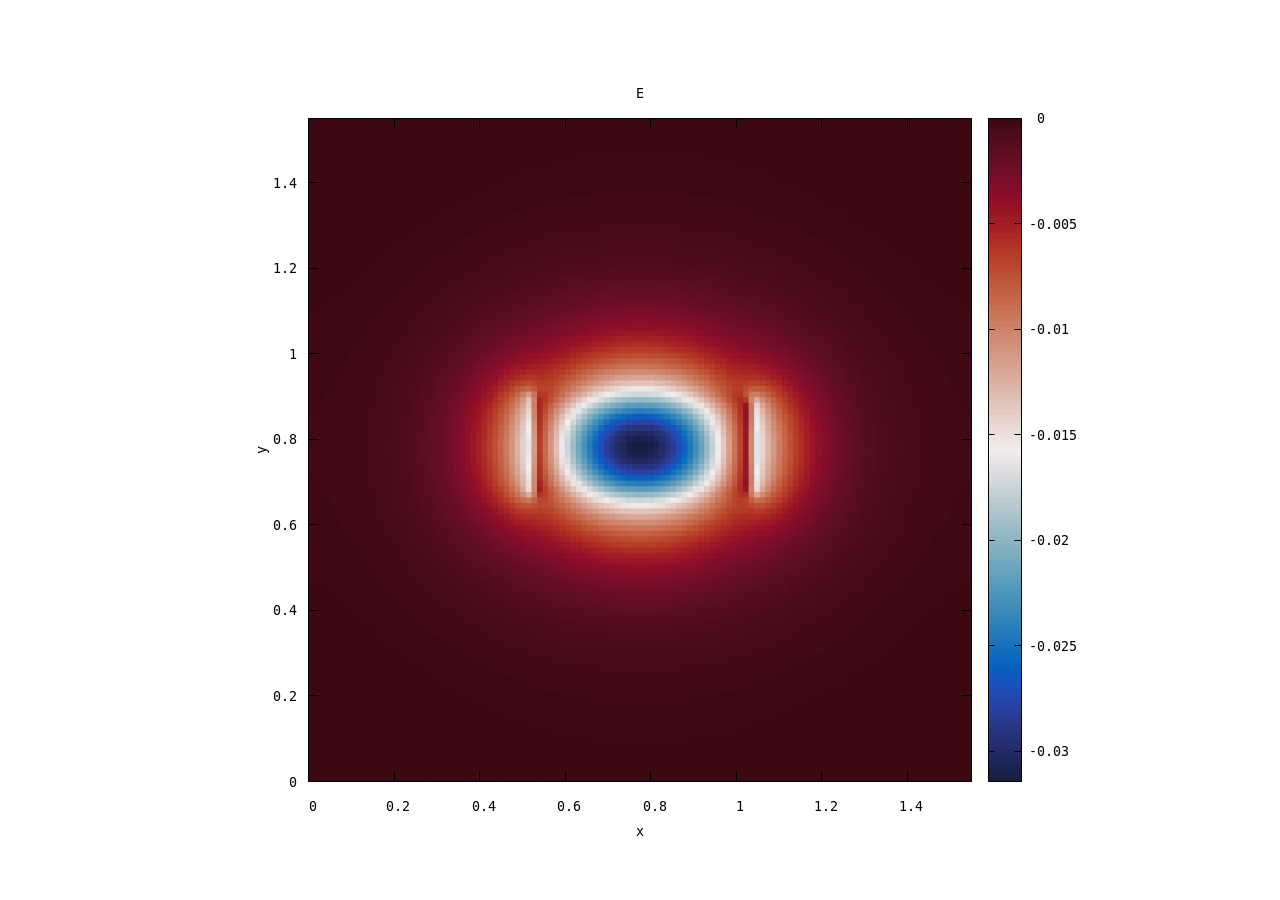

In [82]:
n = 1
Ex = sim(extractreshape, eig_vecs[:,n] ,ŷ)
println(sqrt(eig_vals[n]) / (2pi / λ₀))
sim(HeatMap,Ex,title = "'mode profile'",axes = E_axes)
#sim(saveplot)

1.762020202298991 - 5.471179832901888e-15im


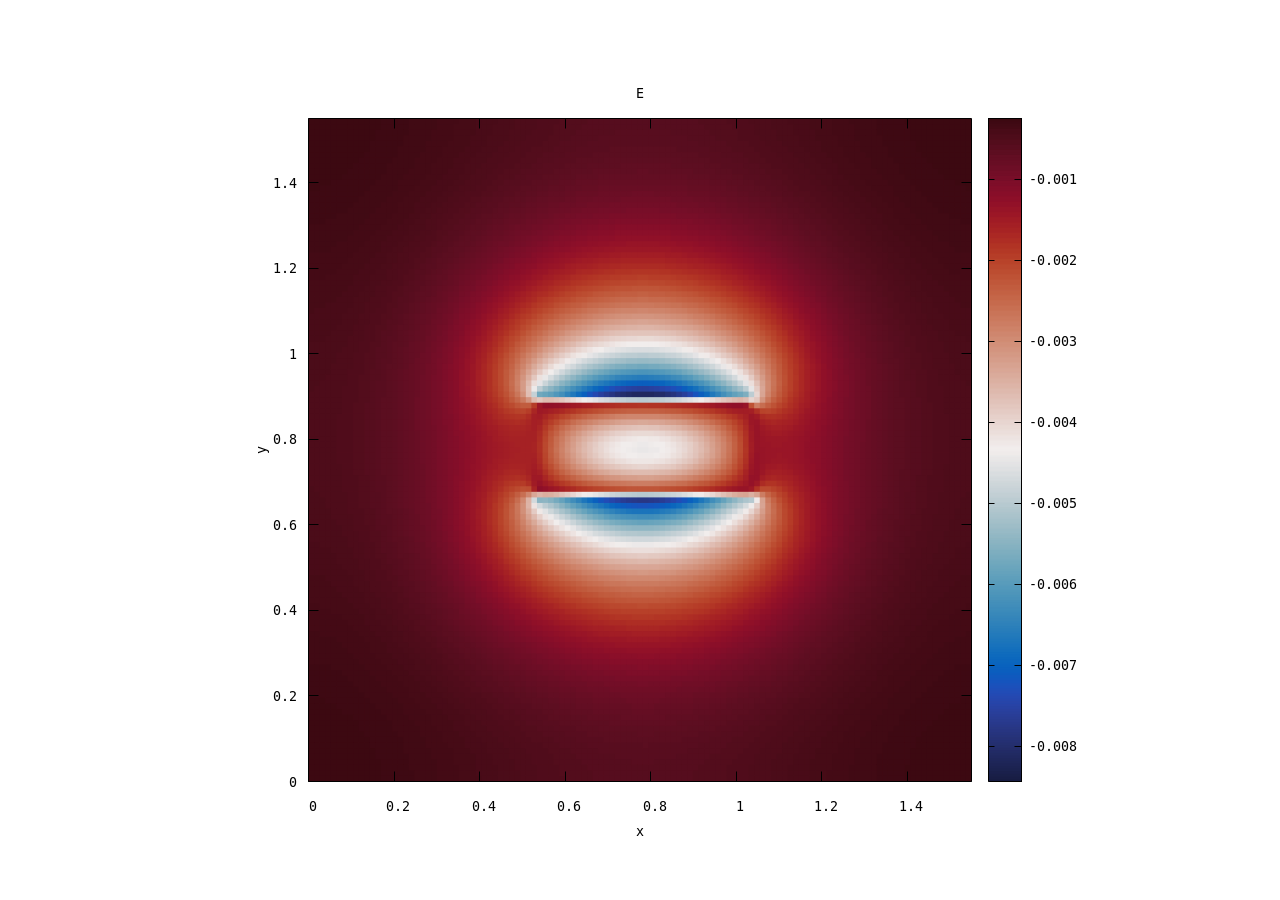

In [81]:
n = 2
Ey = sim(extractreshape, eig_vecs[:,n] ,x̂) 
println(sqrt(eig_vals[n]) / (2pi / λ₀))
sim(HeatMap,Ey,axes = E_axes)
#sim(saveplot)